In [67]:
import altair as alt

In [68]:
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [69]:
import pandas as pd
movies=pd.read_csv("http://bit.ly/imdbratings")
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


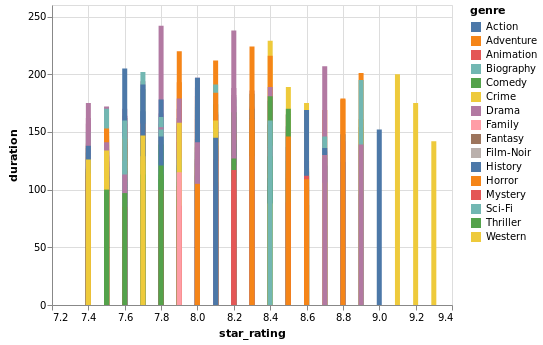

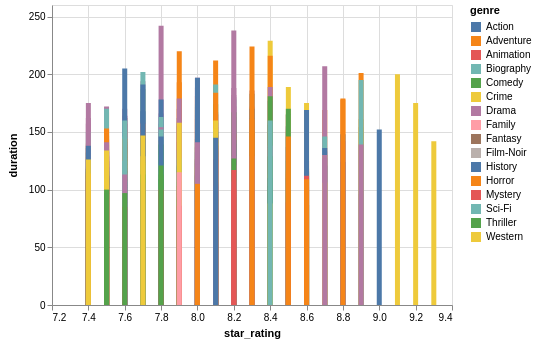

In [70]:
alt.Chart(movies).mark_bar().encode(
    x='star_rating'
    
    ,y='duration',
    color='genre'

).interactive()

## To convert into datatypes
- df['num']=df.index.astype(int)

In [71]:
from vega_datasets import data
t=data.iris()
t.head()

,petalLength,petalWidth,sepalLength,sepalWidth,species
0,1.4,0.2,5.1,3.5,setosa
1,1.4,0.2,4.9,3.0,setosa
2,1.3,0.2,4.7,3.2,setosa
3,1.5,0.2,4.6,3.1,setosa
4,1.4,0.2,5.0,3.6,setosa


In [72]:
import altair as alt
alt.renderers.enable("notebook")

RendererRegistry.enable('notebook')

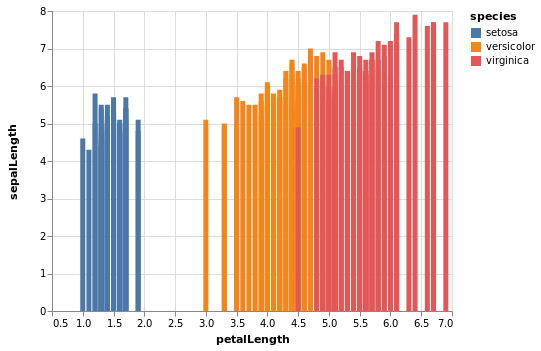

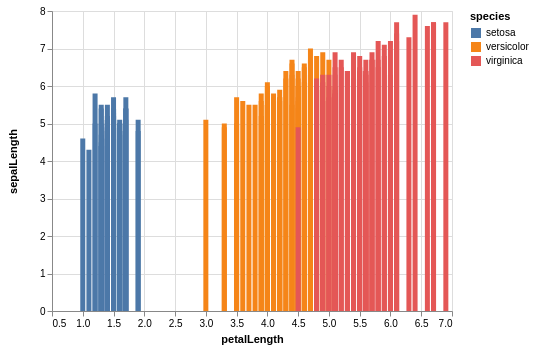

In [73]:
alt.Chart(t).mark_bar().encode(
x='petalLength', y='sepalLength', color='species'
).interactive()

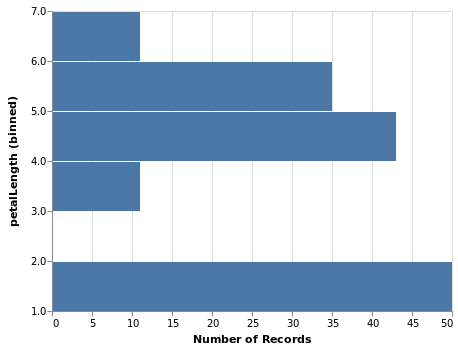

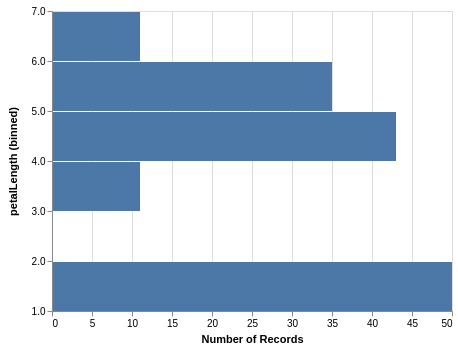

In [74]:
import altair as alt
alt.renderers.enable('notebook')
alt.Chart(t).mark_bar().encode(
    y=alt.Y('petalLength', bin=True),
    x='count()'
   
).interactive()

- we use x=alt.X('ARGUMENT',bin=True) To bin x-axis
-        y=alt.Y('ARGUMENT', bin=True)  To bin y axis 

- if x-axis is binned then we use y-axis as y='count()'
- if y-axis is binned then we use x-axis as x='count()'

In [75]:
import altair as alt
alt.renderers.enable('notebook')
from vega_datasets import data
p=data.iris()
p.head()

,petalLength,petalWidth,sepalLength,sepalWidth,species
0,1.4,0.2,5.1,3.5,setosa
1,1.4,0.2,4.9,3.0,setosa
2,1.3,0.2,4.7,3.2,setosa
3,1.5,0.2,4.6,3.1,setosa
4,1.4,0.2,5.0,3.6,setosa


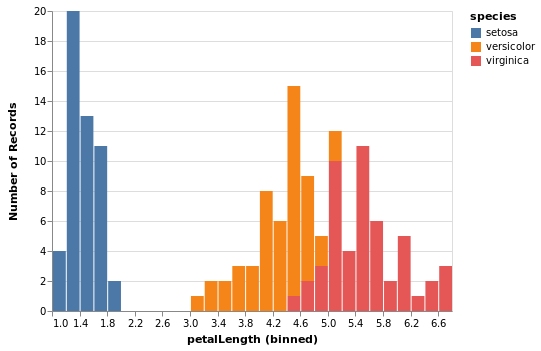

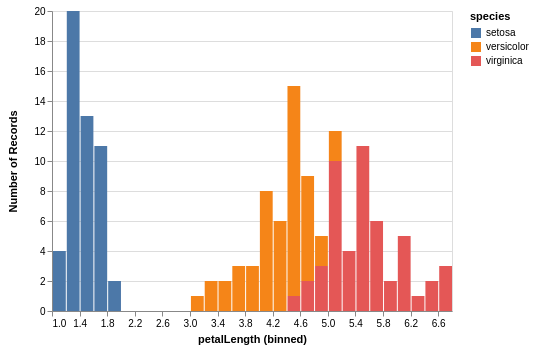

In [76]:
alt.Chart(p).mark_bar().encode(
x=alt.X('petalLength',bin=alt.Bin(maxbins=50)),
y='count()',
color='species'
).interactive()

- To more control over bin we should use this bin=alt.Bin(maxbins=50)

In [77]:
import altair as alt
alt.renderers.enable('notebook')
from vega_datasets import data
p=data.iris()
p.head()

,petalLength,petalWidth,sepalLength,sepalWidth,species
0,1.4,0.2,5.1,3.5,setosa
1,1.4,0.2,4.9,3.0,setosa
2,1.3,0.2,4.7,3.2,setosa
3,1.5,0.2,4.6,3.1,setosa
4,1.4,0.2,5.0,3.6,setosa


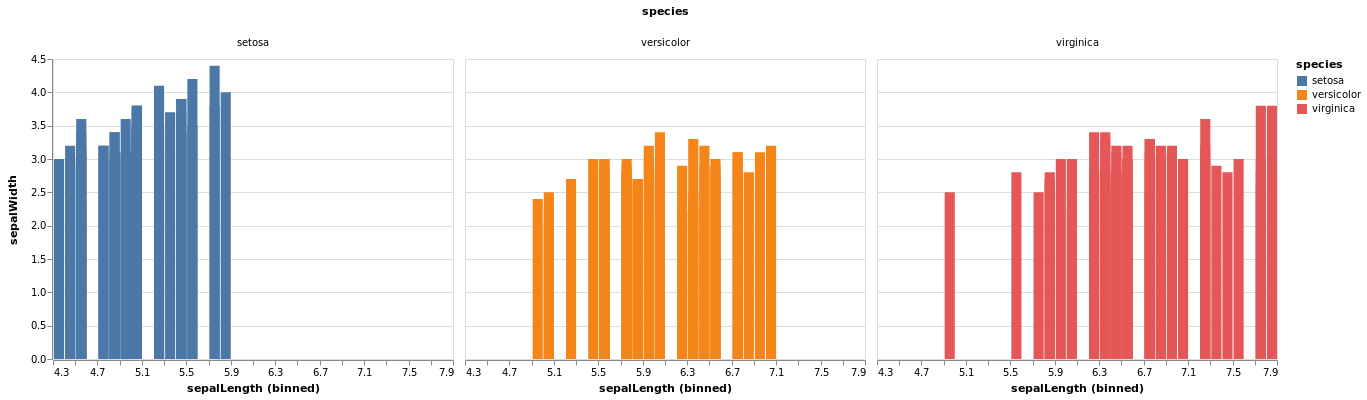

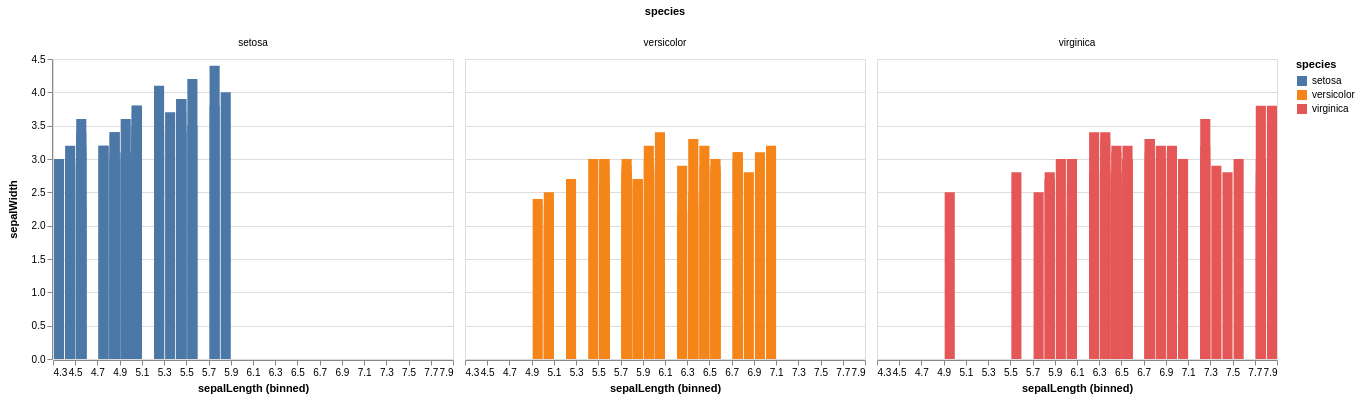

In [78]:
alt.Chart(p).mark_bar().encode(
x=alt.X('sepalLength', bin=alt.Bin(maxbins=50)),
y='sepalWidth',
    color='species',
    column='species'
).interactive()

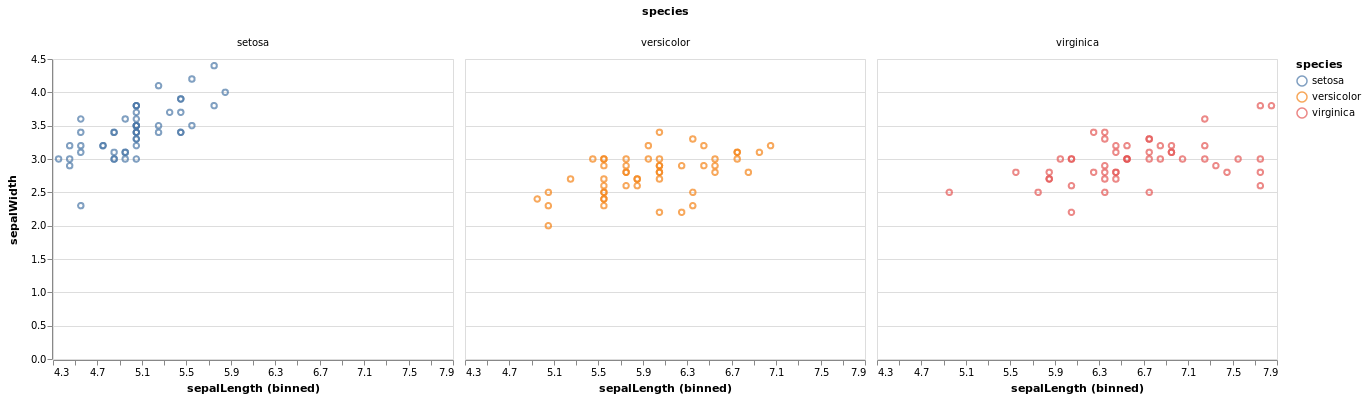

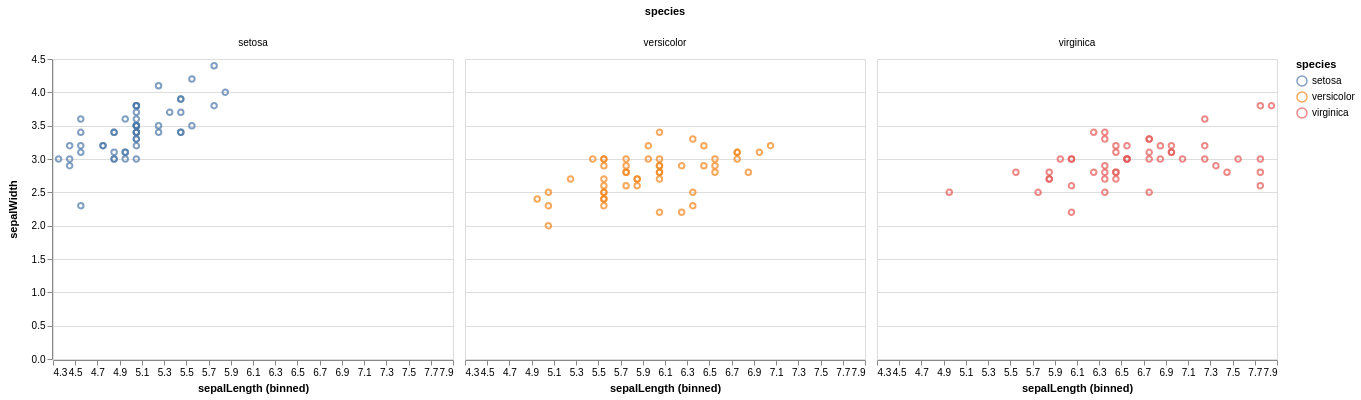

In [79]:
interval=alt.selection_interval()
alt.Chart(p).mark_point().encode(
x=alt.X('sepalLength',bin=alt.Bin(maxbins=60)),
y='sepalWidth',
color='species',
column='species'
).properties(selection=interval)


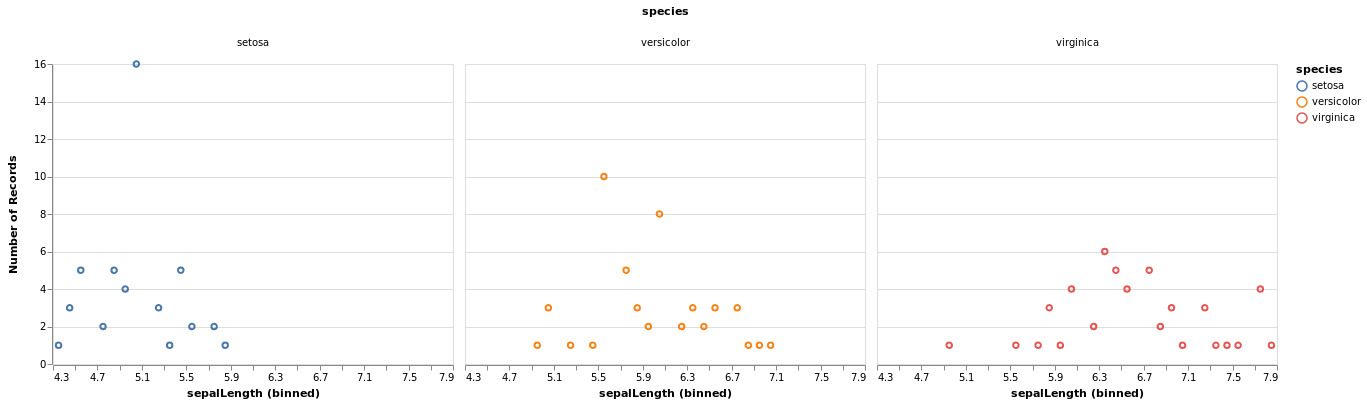

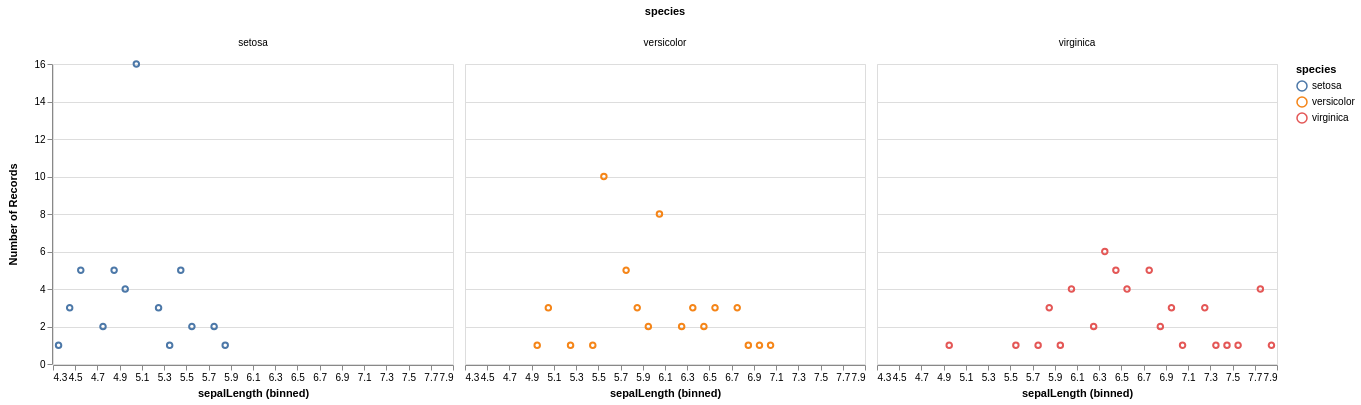

In [80]:
interval=alt.selection_interval()
alt.Chart(p).mark_point().encode(
x=alt.X('sepalLength',bin=alt.Bin(maxbins=50)),
y='count()',
color=alt.condition(interval,'species',alt.value('black')),
column='species'
).properties(selection=interval)

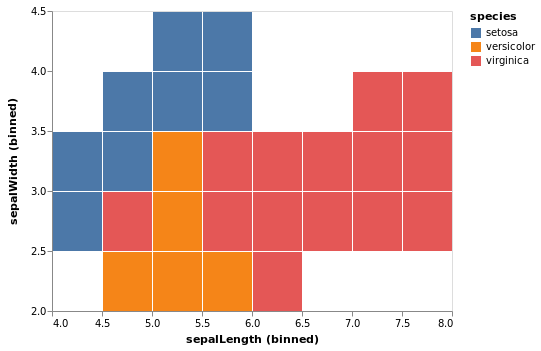

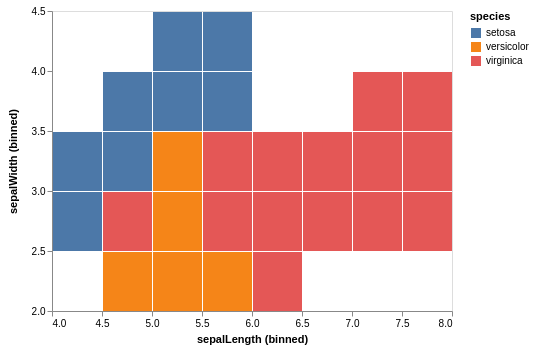

In [81]:
interval=alt.selection_interval()
alt.Chart(p).mark_bar().encode(
x=alt.X('sepalLength',bin=alt.Bin(maxbins=10)),
y=alt.Y('sepalWidth',bin=alt.Bin(maxbins=10)),
color=alt.condition(interval,'species',alt.value('red'))
).properties(selection=interval)

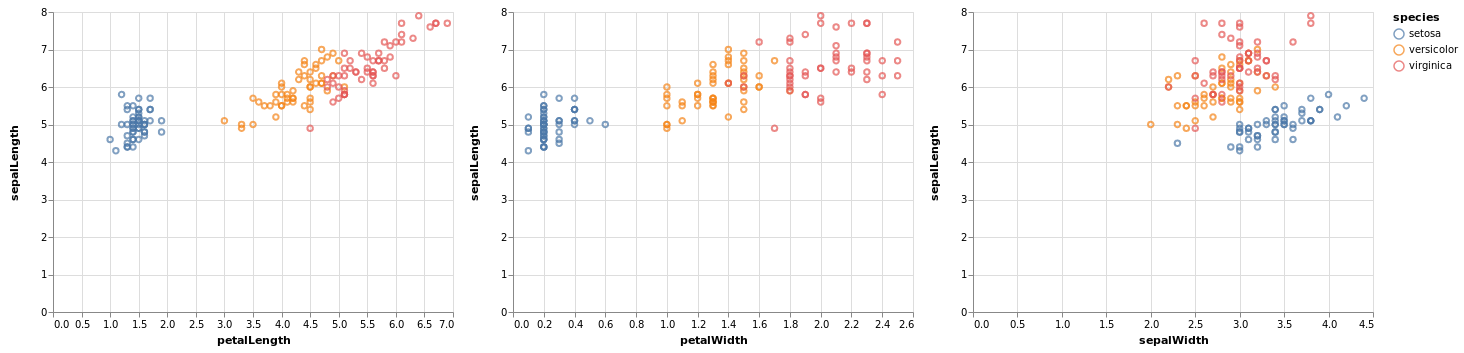

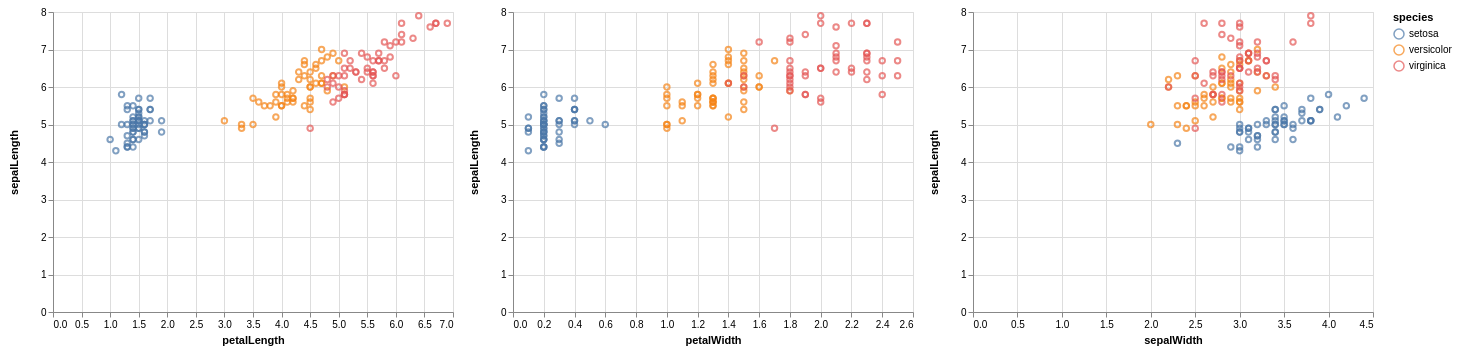

In [82]:
interval=alt.selection_interval(encodings=['x'])
base=alt.Chart(p).mark_point().encode(
y='sepalLength',
color=alt.condition(interval,'species',alt.value('green'))
).properties(selection=interval)
base.encode(x='petalLength') | base.encode(x='petalWidth')|base.encode(x='sepalWidth')

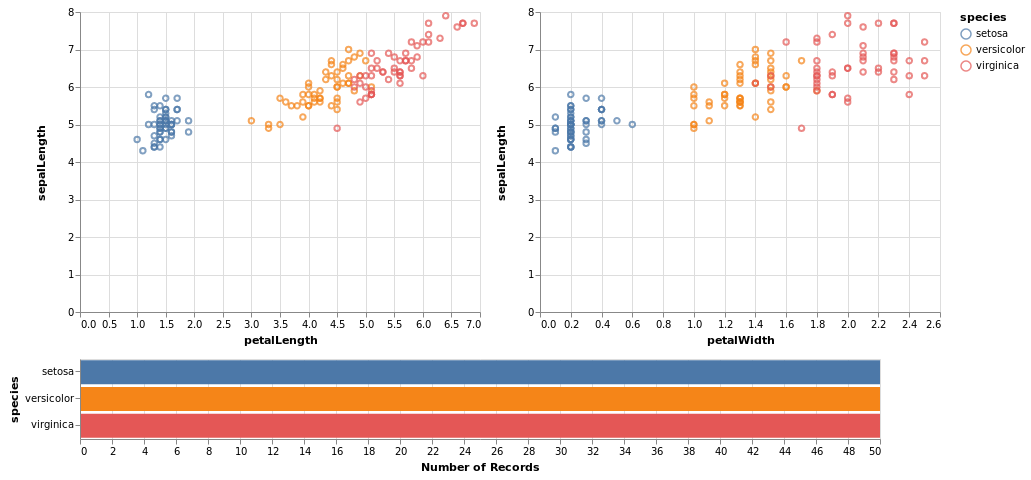

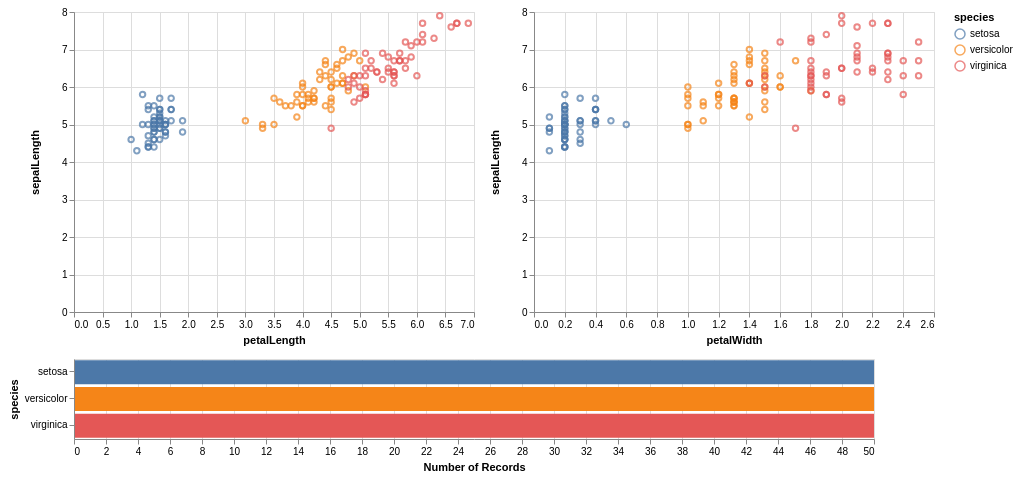

In [88]:
interval=alt.selection_interval(encodings=['x'])
base=alt.Chart(p).mark_point().encode(
y='sepalLength',
color=alt.condition(interval,'species',alt.value('green'))
).properties(selection=interval)

hist=alt.Chart(p).mark_bar().encode(
x='count()',
y='species',
color='species'
).properties(
width=800,
height=80).transform_filter(interval)
scatter=base.encode(x='petalLength') | base.encode(x='petalWidth')
scatter & hist
